I will start the task of Unemployment Analysis by importing the necessary Python libraries and the dataset that we need for this task:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df = pd.read_csv("Unemployment in India.csv")

Dataset first few rows:

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


Dataset rows and columns count:

In [ ]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  768
Number of columns are:  7


Dataset information:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Duplicate values:

In [ ]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 27


Missing values:

In [ ]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


Visualizing the missing values:

<Axes: >

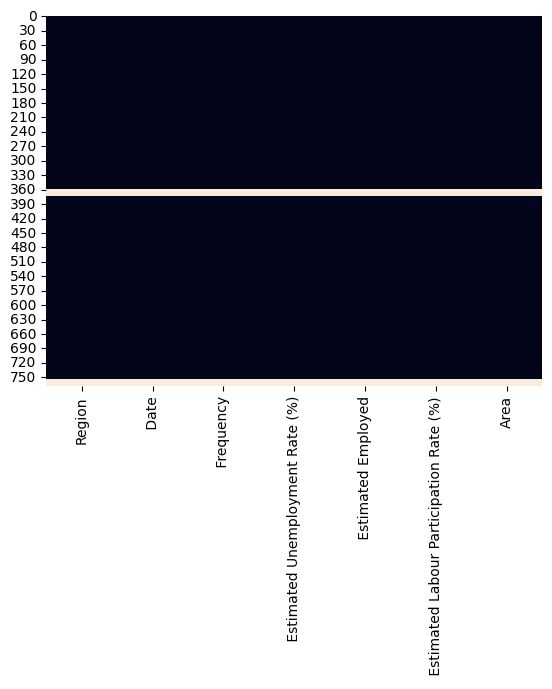

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

Understanding the variables:

In [ ]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df.describe(include= 'all').round(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.00,740.00,740.00,740
unique,28,14,2,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.79,7204460.03,42.63,NaN
std,NaN,NaN,NaN,10.72,8087988.43,8.11,NaN
min,NaN,NaN,NaN,0.00,49420.00,13.33,NaN
25%,NaN,NaN,NaN,4.66,1190404.50,38.06,NaN
50%,NaN,NaN,NaN,8.35,4744178.50,41.16,NaN
75%,NaN,NaN,NaN,15.89,11275489.50,45.50,NaN


Check unique values for each variable:

In [ ]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Region is 28
No. of unique values in  Date is 14
No. of unique values in  Frequency is 2
No. of unique values in  Estimated Unemployment Rate (%) is 624
No. of unique values in  Estimated Employed is 740
No. of unique values in  Estimated Labour Participation Rate (%) is 626
No. of unique values in Area is 2


Data wrangling code:

In [ ]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']

In [ ]:
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month
df['Month_int'] = df['Month'].apply(lambda x: int(x) if pd.notna(x) else x)

In [ ]:
df.drop(columns='Month', inplace=True)

In [ ]:
df_ld = df.copy()

In [ ]:
df=df.dropna()

In [ ]:
mask = (df['Date'] >= '2019-05-31') & (df['Date'] <= '2020-03-31')
df = df.loc[mask]

In [ ]:
mask = (df_ld['Date'] >= '2020-04-30')
df_ld = df_ld.loc[mask]

Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables:-

Chart - 1 : Region Wise Estimated Unemployment Rate

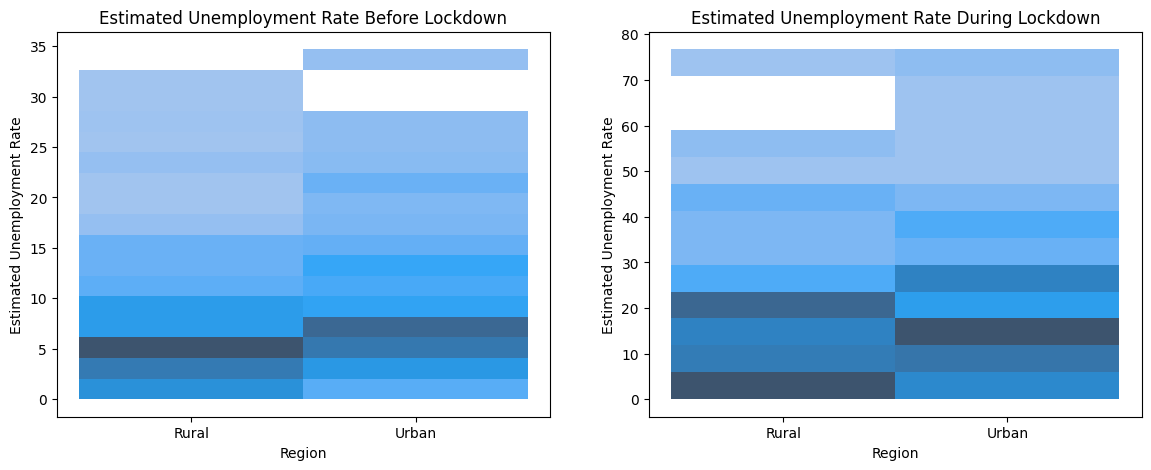

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(x='Region', y='Estimated Unemployment Rate', data=df)
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize=12)
plt.subplot(1, 2, 2)
sns.histplot(x='Region', y='Estimated Unemployment Rate', data=df_ld)
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize=12)
plt.show()

Chart - 2 : Swarm Plot for State Wise Estimated Unemployment Rate

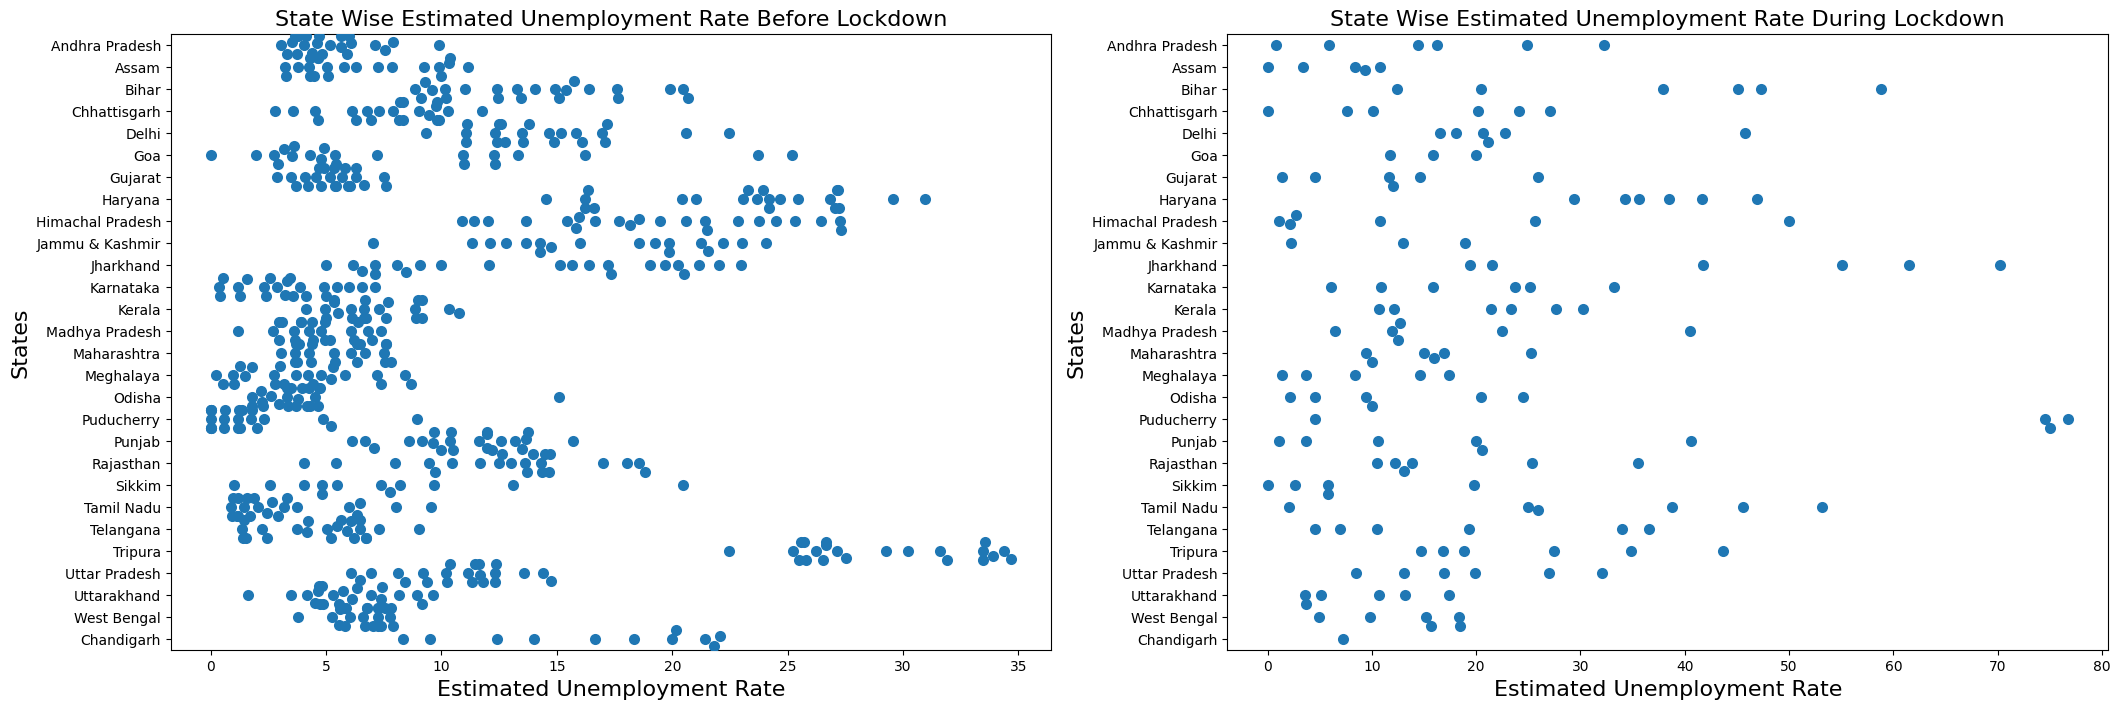

In [ ]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title("State Wise Estimated Unemployment Rate Before Lockdown", fontsize=16)
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df, size=8)
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)
plt.subplot(1, 2, 2)
plt.title("State Wise Estimated Unemployment Rate During Lockdown", fontsize=16)
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df_ld, size=8)
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)
plt.show()

Chart - 3 : Bar Plot for State Wise Estimated Unemployment Rate

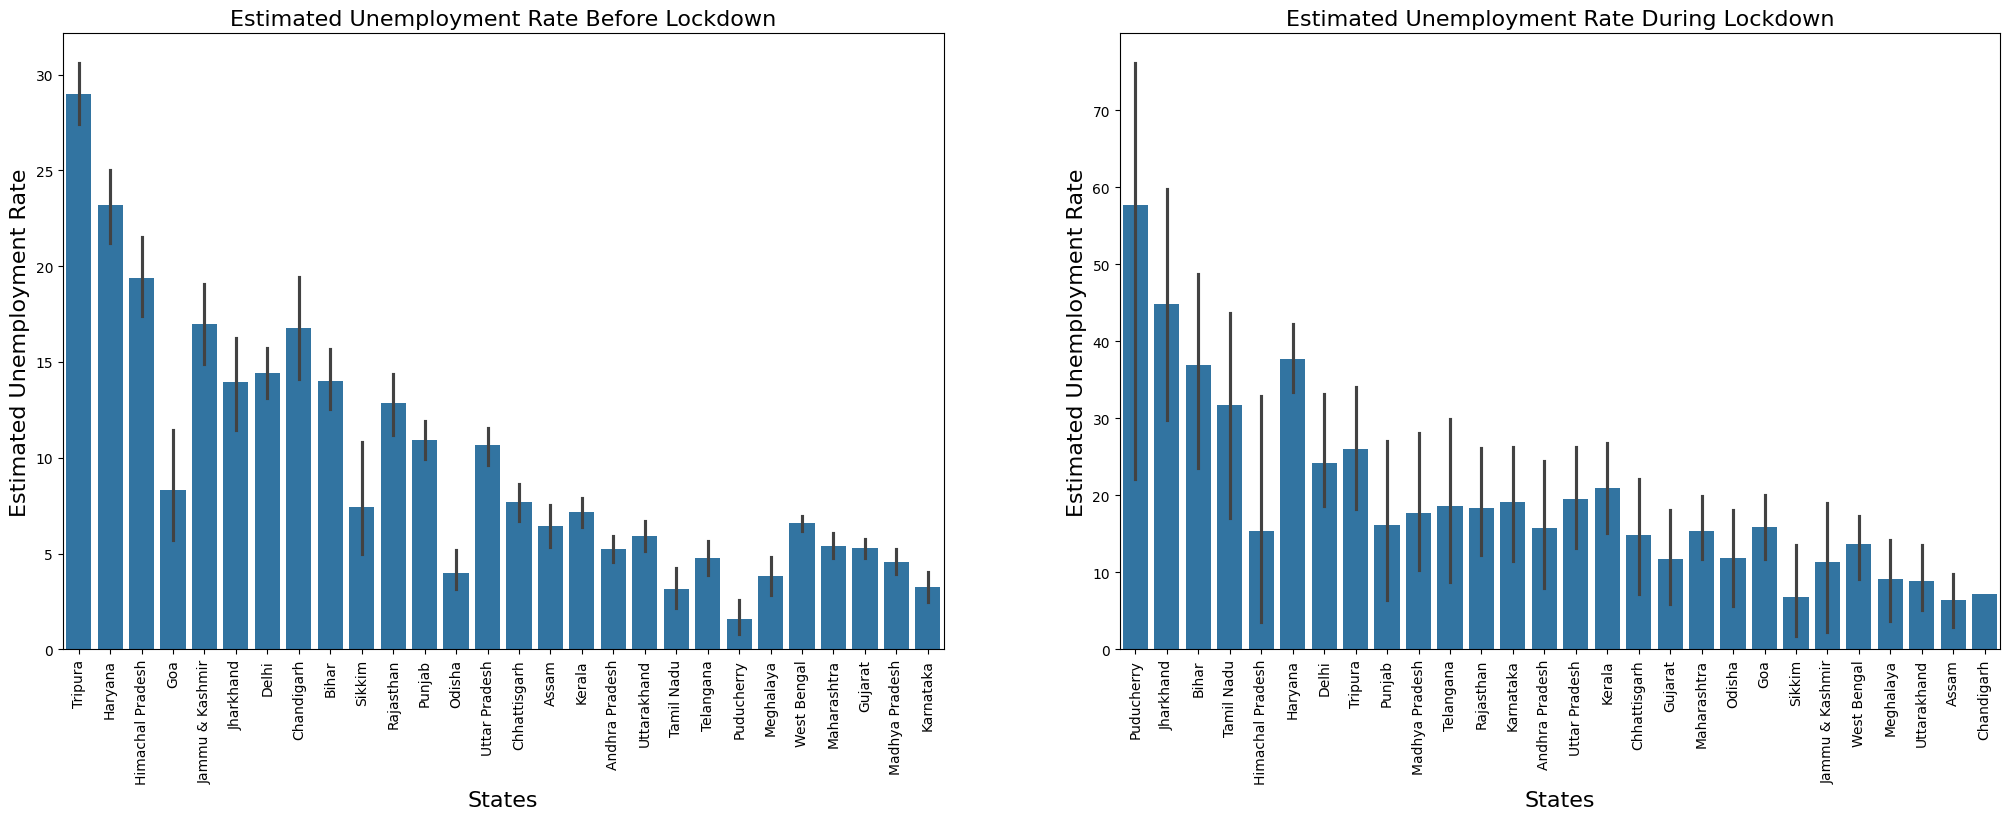

In [ ]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)
sns.barplot(data=df.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)
plt.subplot(1, 2, 2)
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)
sns.barplot(data=df_ld.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)
plt.show()

Chart - 4 : Line plot for State Wise Estimated Employed Workforce

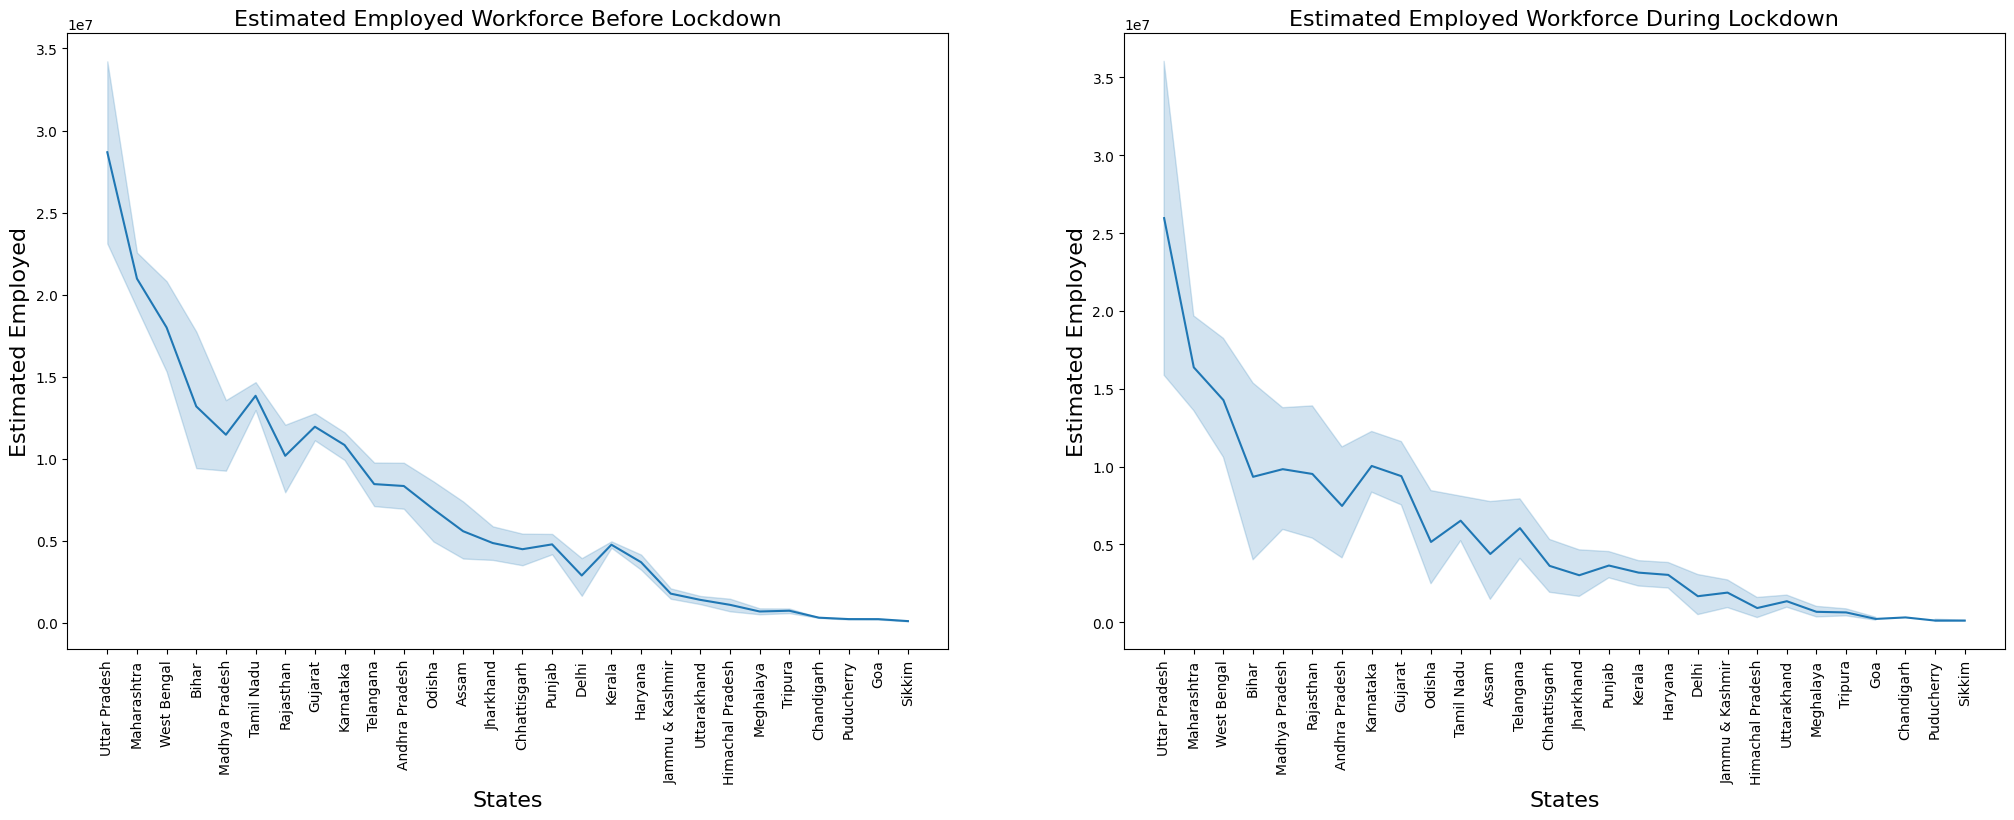

In [ ]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title("Estimated Employed Workforce Before Lockdown", fontsize=16)
sns.lineplot(data=df.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)
plt.subplot(1, 2, 2)
plt.title("Estimated Employed Workforce During Lockdown", fontsize=16)
sns.lineplot(data=df_ld.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)
plt.show()

Chart - 5 : Violin plot for State Wise Estimated Labour Participation Rate

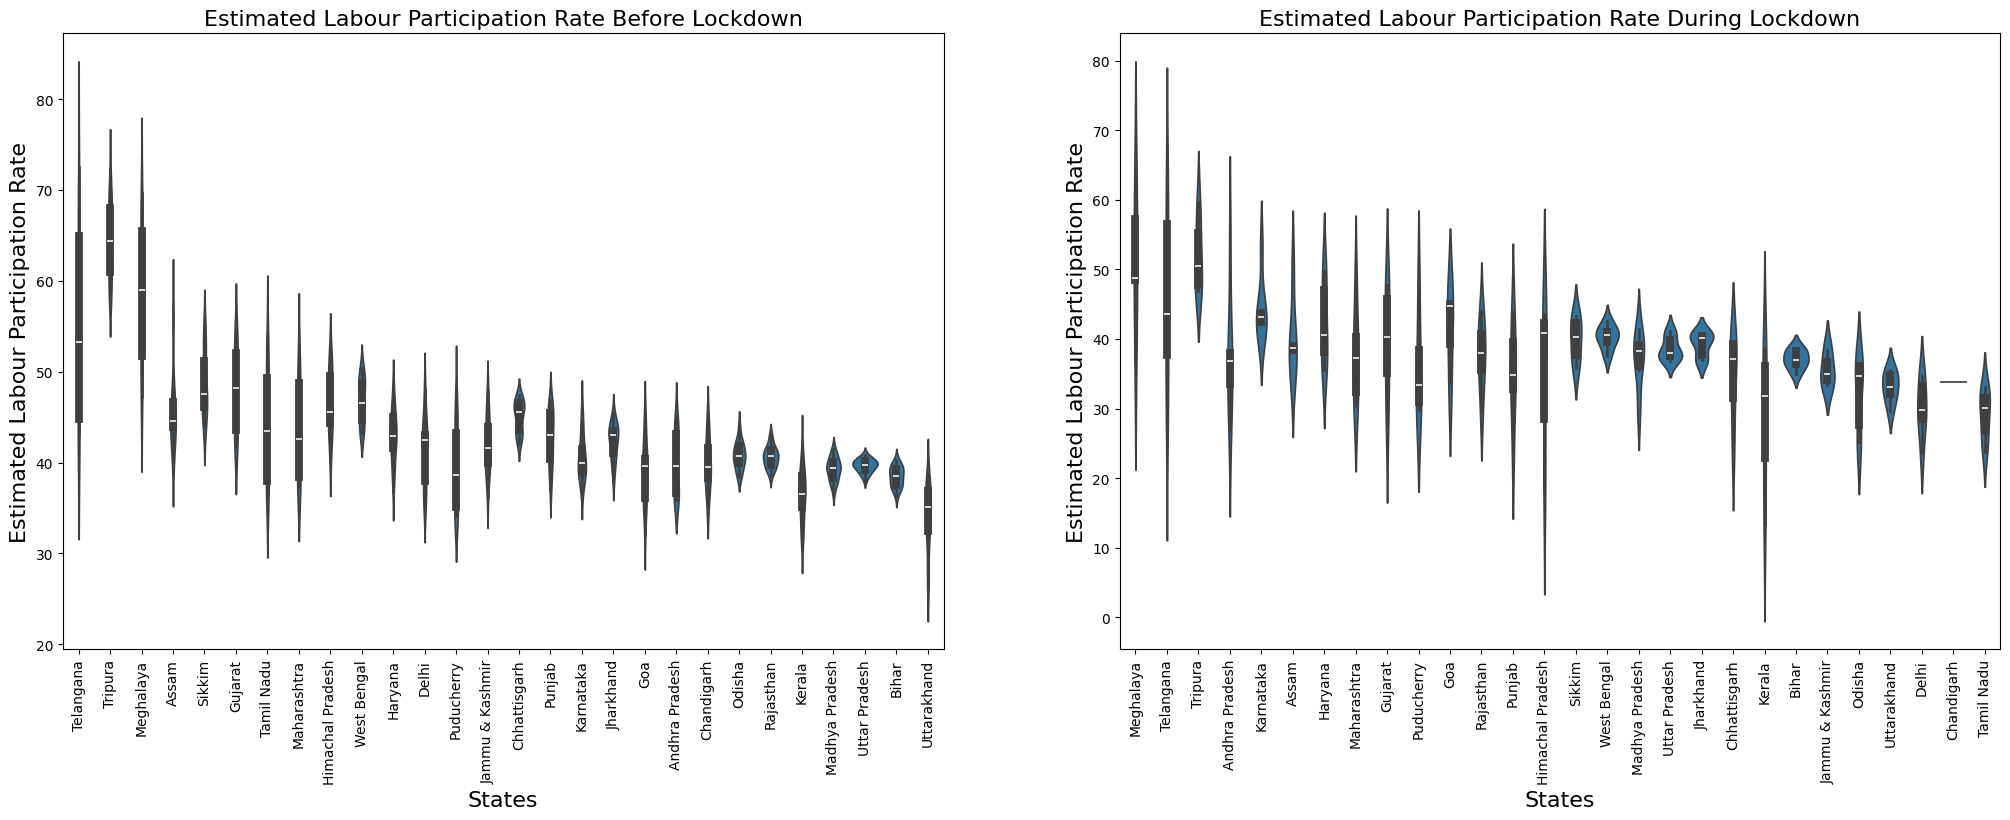

In [ ]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title("Estimated Labour Participation Rate Before Lockdown", fontsize=16)
sns.violinplot(data=df.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", y="Estimated Labour Participation Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)
plt.subplot(1, 2, 2)
plt.title("Estimated Labour Participation Rate During Lockdown", fontsize=16)
sns.violinplot(data=df_ld.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", y="Estimated Labour Participation Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)
plt.show()

Chart - 6 : Correlation Heatmap

In [ ]:

df1_stats = df[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

df2_stats = df_ld[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

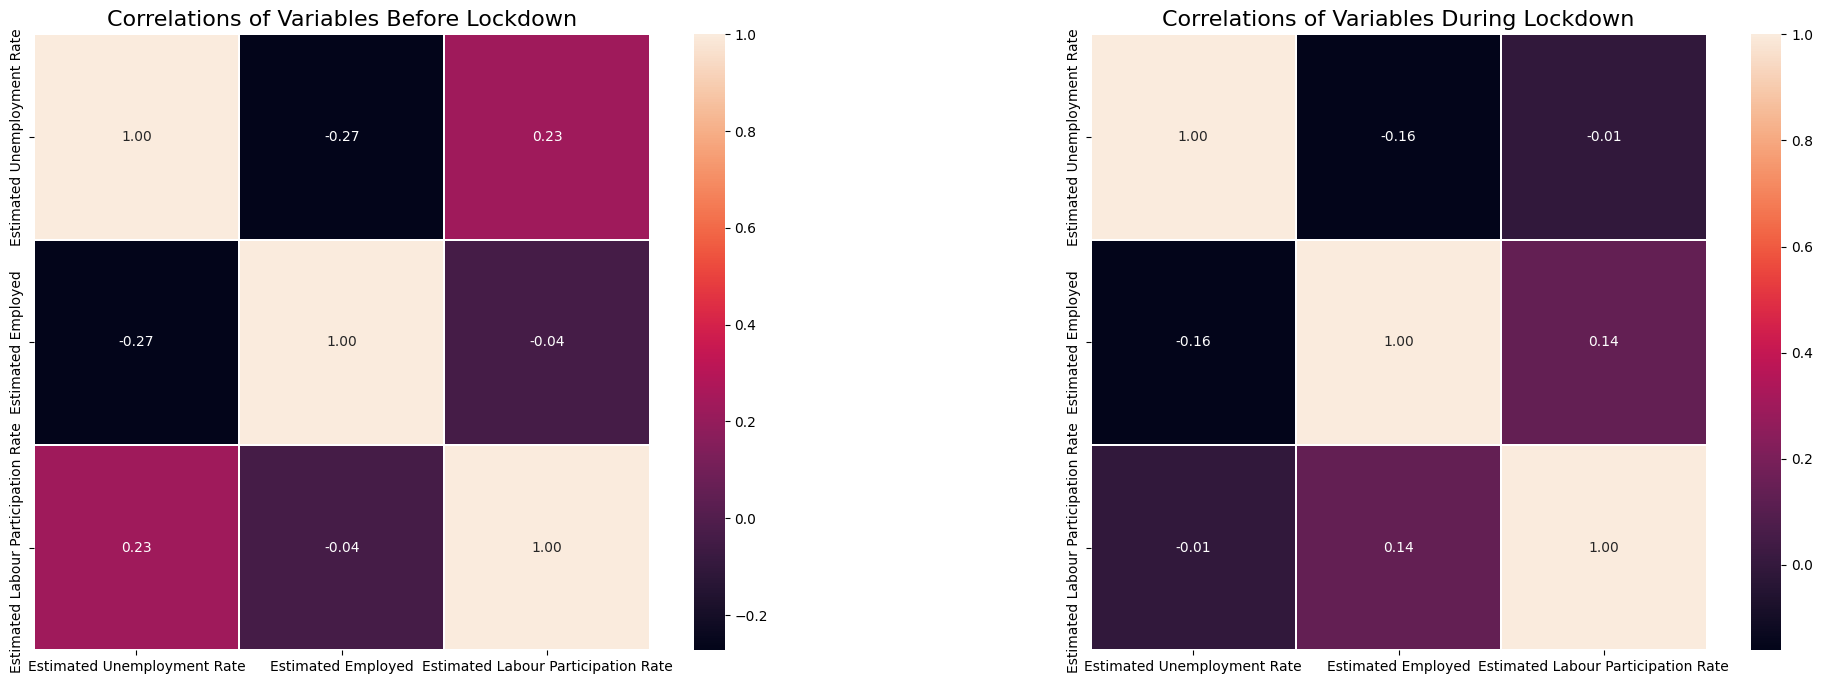

In [ ]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title("Correlations of Variables Before Lockdown", fontsize=16)
sns.heatmap(df1_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.subplot(1, 2, 2)
plt.title("Correlations of Variables During Lockdown", fontsize=16)
sns.heatmap(df2_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

Hypothesis testing:

In [ ]:
from scipy.stats import f_oneway
regions = df['Region'].unique()
anova_data = [df[df['Region'] == region]['Estimated Unemployment Rate'] for region in regions]
anova_result = f_oneway(*anova_data)
print(f"ANOVA test result: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")
if anova_result.pvalue < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in unemployment rates across regions.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in unemployment rates across regions.")

ANOVA test result: F-statistic = 20.04, p-value = 0.0000
Result: Reject the null hypothesis. There is a significant difference in unemployment rates across regions.


Splitting the data into training and test data:

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Estimated Labour Participation Rate', 'Estimated Employed']]
y = df['Estimated Unemployment Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 411
Test set size: 177


Creating a simple Linear regression model as baseline:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 50.57
R-squared (R2): 0.17


Checking if the model is overfitting:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Model - Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Polynomial Model - R-squared (R2): {r2_poly:.2f}")

Polynomial Model - Mean Squared Error (MSE): 43.46
Polynomial Model - R-squared (R2): 0.29


Evaluating the model:

In [ ]:
final_model = model
y_final_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_final_pred)
final_r2 = r2_score(y_test, y_final_pred)
print(f"Final Model - Mean Squared Error (MSE): {final_mse:.2f}")
print(f"Final Model - R-squared (R2): {final_r2:.2f}")

Final Model - Mean Squared Error (MSE): 50.57
Final Model - R-squared (R2): 0.17


Sample test input for prediction:

In [ ]:
test_input = np.array([[45.0, 12500000]])
linear_pred = model.predict(test_input)
print(f"Predicted Unemployment Rate (Linear Model): {linear_pred[0]:.2f}")
poly_pred = poly_model.predict(test_input)
print(f"Predicted Unemployment Rate (Polynomial Model): {poly_pred[0]:.2f}")


Predicted Unemployment Rate (Linear Model): 8.56
Predicted Unemployment Rate (Polynomial Model): 7.02
